In [28]:
# User input

# data = dataset

task_type_num = int(input(
                    """
                    Task type (int):
                    1. Regression
                    2. Classification
                    3. Clustering
                    """
                    )
                )

task_type_dict = {
    1: "Regression",
    2: "Classification",
    3: "Clustering"
}

task_type_str = task_type_dict[task_type_num]
print(f"Selected task type is {task_type_str}\n")

task_type = task_type_str.lower()

if task_type_str in ("Regression", "Classification"):
    label = input("Select the target column: ")

print(f"Traget column/label is {label}")

ValueError: invalid literal for int() with base 10: ''

In [9]:
# For testing
task_type_list = ['regression', 'classification', 'clustering']

# for task_type in task_type_list:
    
#     if task_type == 'regression':
#         p

#     elif task_type == 'classification':
#         p

#     elif task_type == 'clustering':
#         p


# **I. Import Library**

In [ ]:
import os
import time
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import shapiro

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.inspection import permutation_importance


from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score,
    explained_variance_score,

    accuracy_score,
    precision_score,
    recall_score,
    f1_score,

    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
)

from mealpy import FloatVar, StringVar, IntegerVar, BoolVar, MixedSetVar, Problem, ACOR, GA, PSO, SA

# **II. Dataset**

In [11]:
def load_data(filepath):
    return pd.read_csv(filepath)

In [12]:
# Test load data

for task_type in task_type_list:
    
    if task_type == 'regression':
        df = load_data("../data/insurance.csv")
        df_reg = df
    
    elif task_type == 'classification':
        df = load_data("../data/iris.csv")
        df_clf = df
    
    elif task_type == 'clustering':
        df = load_data("../data/Mall_Customers.csv")
        df_cls = df

    print(df.head(), '\n')

df_list = [df_reg, df_clf, df_cls]
task_df_zip = zip(task_type_list, df_list)

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa 

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1       

# **III. Preprocessing**

In [13]:
def preprocessing(data, task_type, label=None):
    # If there's no label input
    if label is None:
        label = data.columns[-1]

    data = data_cleaning(data, task_type, label)
    data = data_transformation(data, task_type, label)
    
    return data

In [53]:
# Test Preprocessing

for task_type, df in zip(task_type_list, df_list):
    print("\nBefore preprocessing:\n", df.head(), '\n')
    print("After preprocessing:\n", preprocessing(df, task_type), '\n')


Before preprocessing:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 

After preprocessing:
 [          age       sex       bmi  children    smoker    region
0    0.347385  1.023333 -0.447469  0.766327 -0.342193  1.374625
1    1.058097  1.023333  1.629846 -0.059748 -0.342193  1.374625
2    1.768810 -0.977199  1.536196  1.592401 -0.342193  0.467087
3    0.631670  1.023333  0.029292  0.766327 -0.342193  1.374625
4   -0.079043  1.023333 -1.516776  1.592401 -0.342193  0.467087
..        ...       ...       ...       ...       ...       ...
949  1.200240 -0.977199  2.023174 -0.885822 -0.342193  0.467087
950  0.205242  1.023333  1.217788  0.766327 -0.342193  

In [23]:
# Preprocessed data

preprocessed_df_reg = preprocessing(df_reg, task_type='regression')
preprocessed_df_clf = preprocessing(df_clf, task_type='classification')
preprocessed_df_cls = preprocessing(df_cls, task_type='clustering')

preprocessed_df_list = [
    preprocessed_df_reg,
    preprocessed_df_clf,
    preprocessed_df_cls,
]


## 3.1 Data Cleaning

In [14]:
def data_cleaning(data, task_type, label=None): #, alpha, threshold):
    # If there's no label input
    if label is None:
        label = data.columns[-1]
    
    # NA
    data.dropna()

    # Remove duplicates
    data.drop_duplicates()

    # Handle outliers (IQR)
    data = handling_outliers(data) #, alpha) # requires alpha value (default: 0.05)

    # Handle ID-like column
    data = handling_id_cols(data, label) #, threshold) # requires threshold (default: 0.99)
    
    return data

In [13]:
# Test dropna and drop_duplicates
for task_type in task_type_list:
    
    if task_type == 'regression':
        print("Before dropna()", df_reg.empty)
        df_reg.dropna()
        print("After dropna()", df_reg.empty, '\n')

        print("Before drop_duplicates()", len(df_reg.duplicated()))
        df_reg.drop_duplicates()
        print("After drop_duplicates()", len(df_reg.duplicated()), '\n')

    elif task_type == 'classification':
        print("Before dropna()", df_clf.empty)
        df_clf.dropna()
        print("After dropna()", df_clf.empty, '\n')

        print("Before drop_duplicates()", len(df_clf.duplicated()))
        df_clf.drop_duplicates()
        print("After drop_duplicates()", len(df_clf.duplicated()), '\n')

    elif task_type == 'clustering':
        print("Before dropna()", df_cls.empty)
        df_cls.dropna()
        print("After dropna()", df_cls.empty, '\n')

        print("Before drop_duplicates()", len(df_cls.duplicated()))
        df_cls.drop_duplicates()
        print("After drop_duplicates()", len(df_cls.duplicated()), '\n')

Before dropna() False
After dropna() False 

Before drop_duplicates() 1338
After drop_duplicates() 1338 

Before dropna() False
After dropna() False 

Before drop_duplicates() 150
After drop_duplicates() 150 

Before dropna() False
After dropna() False 

Before drop_duplicates() 200
After drop_duplicates() 200 



In [30]:
# Test data_cleaning
for task_type, df in zip(task_type_list, df_list):
    print("Before data_cleaning\n", df, '\n')
    cleaned_data = data_cleaning(df, task_type)
    print("After data_cleaning\n", cleaned_data, '\n')

Before data_cleaning
       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns] 

Index(es) of outlier-contained records: {1031, 524, 1036, 14, 1037, 530, 19, 23, 1047, 1049, 29, 30, 543, 34, 549, 38, 39, 1062, 558, 1070, 49, 53,

### 3.1.1 Handling Outliers

In [15]:
def handling_outliers(df, alpha=0.05):
    """
    Handles outliers by dropping the records containing outlier(s).

    Parameters:
        df (pd.DataFrame): The input dataframe.
        alpha (float): The alpha value as the threshold to determine the normality of a data (default: 0.05).
    
    Returns:
        pd.DataFrame: The dataframe with records containing outlier(s) removed.
    """
    numeric_features = df.select_dtypes(include=[np.number]).columns # Retrieving numeric features from the dataset
    outlier_indices = set()  # Use a set to store unique indices of outlier rows

    # Iterating through each numeric features
    for numeric_feature in numeric_features:
        data = df[numeric_feature]          # Store the selected column into an object called "data"

        _, p = shapiro(data)                # Retrieving p velue evaluated from the Shapiro-Wilk Statistical test

        if p > alpha:
            pass                            # Skipping normally distributed data
        else:
            q1 = data.quantile(0.25)        # Retrieving the value of the 1st quantile (25%)
            q3 = data.quantile(0.75)        # Retrieving the value of the 3rd quantile (75%)
            iqr = q3 - q1                   # Interquartile range

            # Define bounds for outliers
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr

            # Identify outlier indices
            outliers = df[(data < lower_bound) | (data > upper_bound)].index
            outlier_indices.update(outliers)  # Add these indices to the set
    
    # # Testing
    # print("Index(es) of outlier-contained records:", outlier_indices, '\n')

    # Drop rows containing outliers
    return df.drop(index=outlier_indices)

In [25]:
# Test handling_outliers
for task_type in task_type_list:
    
    if task_type == 'regression':
        handling_outliers(df_reg)

    elif task_type == 'classification':
        handling_outliers(df_clf)  

    elif task_type == 'clustering':
        handling_outliers(df_cls)


Index(es) of outlier-contained records: {1031, 524, 1036, 14, 1037, 530, 19, 23, 1047, 1049, 29, 30, 543, 34, 549, 38, 39, 1062, 558, 1070, 49, 53, 1078, 55, 569, 1088, 577, 1090, 1096, 587, 82, 84, 86, 1111, 1117, 94, 1118, 609, 1122, 1124, 615, 109, 621, 623, 1139, 116, 629, 1146, 123, 1152, 1156, 146, 665, 667, 668, 158, 161, 674, 1186, 677, 682, 175, 689, 1206, 1207, 185, 697, 706, 1218, 203, 1230, 725, 1240, 1241, 223, 736, 1249, 738, 739, 742, 240, 242, 759, 251, 252, 254, 256, 1284, 263, 1288, 265, 1291, 271, 1300, 1301, 1303, 281, 286, 288, 1313, 803, 292, 1317, 298, 1323, 819, 312, 314, 826, 828, 322, 327, 328, 330, 842, 845, 847, 338, 850, 852, 856, 860, 883, 373, 377, 381, 893, 901, 401, 917, 420, 421, 422, 947, 951, 441, 953, 956, 958, 476, 488, 500, 1012, 1021, 1022} 

Index(es) of outlier-contained records: set() 

Index(es) of outlier-contained records: {198, 199} 



### 3.1.2 Handling ID-like Columns

In [16]:
def handling_id_cols(df, label=None, threshold=0.99999):
    """
    Handles id-like columns by dropping those with high cardinality.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        label (str): The label column to exclude from removal (default: None).
        threshold (float): The cardinality threshold to identify id-like columns (default: 0.99).
    
    Returns:
        pd.DataFrame: The dataframe with id-like columns removed.
    """
    # If there's no label input
    if label is None:
        label = df.columns[-1]

    # Identify id-like columns
    id_like_cols = [
        col for col in df.columns
        if df[col].nunique() / len(df) > threshold and col != label
    ]

    # # Testing
    # print("ID-like column:", id_like_cols, '\n')

    # Drop id-like columns
    return df.drop(columns=id_like_cols)


In [28]:
# Test handling_id_cols
for task_type in task_type_list:
    
    if task_type == 'regression':
        handling_id_cols(df_reg)

    elif task_type == 'classification':
        handling_id_cols(df_clf)  

    elif task_type == 'clustering':
        handling_id_cols(df_cls)


ID-like column: [] 

ID-like column: ['Id'] 

ID-like column: ['CustomerID'] 



## 3.2 Data Transformation

In [242]:
# Pipeline
def data_transformation(data, task_type, label=None):
        
    # For supervised task
    if task_type in ('regression', 'classification'):

        # If there's no label input
        if label is None:
            label = data.columns[-1]

        # All column name
        colnames = data.columns

        # Retirieving categorical feature names
        feature_names = data.drop(columns=label).select_dtypes(exclude=[np.number]).columns

        # Feature-target split
        X, y = feature_target_split(data, label)

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

        # Encoding (X_train, X_test, y_train, y_test)
        data = feature_target_encoding(X_train, X_test, y_train, y_test, feature_names)

        # Feature Scaling
        data[0] = pd.DataFrame(self.scaler.fit_transform(data[0]), columns=colnames)    # Scaling X_train
        data[1] = pd.DataFrame(self.scaler.transform(data[1]), columns=colnames)        # Scaling X_test

    # For unsupervised task
    elif task_type == 'clustering':

        # All column name
        colnames = data.columns

        # Encoding
        data = feature_encoding(data)

        # Scaling
        data = pd.DataFrame(self.scaler.fit_transform(data), columns=colnames)

    return data

In [17]:
# Dev purps
scaler = StandardScaler()

def data_transformation(data, task_type, label=None):

    # For supervised task
    if task_type in ('regression', 'classification'):

        # If there's no label input
        if label is None:
            label = data.columns[-1]

        # All column name
        colnames = data.drop(columns=label).columns            

        # Retirieving categorical feature names
        feature_names = data.drop(columns=label).select_dtypes(include=["object"]).columns

        # Feature-target split
        X, y = feature_target_split(data, label)

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y if task_type == 'classification' else None)

        # Encoding (X_train, X_test, y_train, y_test)
        data = feature_target_encoding(X_train, X_test, y_train, y_test, task_type, feature_names)

        # Feature Scaling
        data[0] = pd.DataFrame(scaler.fit_transform(data[0]), columns=colnames)    # Scaling X_train
        data[1] = pd.DataFrame(scaler.transform(data[1]), columns=colnames)        # Scaling X_test

    # For unsupervised task
    elif task_type == 'clustering':

        # All column name
        colnames = data.columns
        
        # Encoding
        data = feature_encoding(data)

        # Scaling
        data = pd.DataFrame(scaler.fit_transform(data), columns=colnames)

    return data

In [51]:
# Testing data transformation
for task_type, df in zip(task_type_list, df_list):
    print("Before Data Transformation:\n", df, '\n')

    cleaned_df = data_cleaning(df, task_type)
    transformed_df = data_transformation(cleaned_df, task_type)

    print("After Data Transformation:\n", transformed_df, '\n')

Before Data Transformation:
       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns] 

After Data Transformation:
 [          age       sex       bmi  children    smoker    region
0    0.347385  1.023333 -0.447469  0.766327 -0.

### 3.2.1 Data Splitting (Feature-Target Split)

In [18]:
def feature_target_split(data, label=None):
    # If there's no label input
    if label is None:
        label = data.columns[-1]
    
    if label:
        X = data.drop(columns=label)
        y = data[label]
    else:
        X = data.iloc[:,:-1]
        y = data.iloc[:,-1]

    return X, y

In [45]:
# Testing feature_target_split
for task_type, df in zip(task_type_list, df_list):
    print("Before ft-split:\n", df, '\n')
    
    X, y = feature_target_split(df)
    
    print("After ft-split:\n")
    print("X:\n", X, '\n')
    print("y:\n", y, '\n')

Before ft-split:
       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns] 

After ft-split:

X:
       age     sex     bmi  children smoker     region
0      19  female  27.900         0    yes  southwest
1      18    male  33.

### 3.2.2 Categorical Feature/Target Encoding

#### 3.2.2.1 Feature-Target Encoding (Supervised)

In [35]:
# Pipeline
def feature_target_encoding(X_train, X_test, y_train, y_test, task_type, feature_names=None):
    
    if feature_names is None:
        feature_names = X_train.select_dtypes(exclude=[np.number]).columns
    
    # Instantiating encoders dicationary
    feature_encoders = {}
    target_encoder = None
    
    # Encoding each column through iteration
    for feature in feature_names:

        # Instantiate LabelEncoder object
        fe = LabelEncoder()

        # Fit and transform the features of the train set
        X_train[feature] = fe.fit_transform(X_train[feature])

        # Fit and transform the features of the test set
        X_test[feature] = fe.transform(X_test[feature])

        # Store the fitted feature encoders
        feature_encoders[feature] = fe
    
    if task_type == 'classification':
        # Instantiate the encoder object for target
        te = LabelEncoder()

        # Encoding the target of the train set
        y_train = te.fit_transform(y_train)

        # Encoding the target of the test set
        y_test = te.transform(y_test)

        # Store the fitted target encoder
        target_encoder = te

    # Store all the fitted encoders
    self.encoders['feature_encoders'] = feature_encoders
    self.encoders['target_encoder'] = target_encoder

    return [X_train, X_test, y_train, y_test]

In [19]:
# Dev purps
all_encoder = {}

def feature_target_encoding(X_train, X_test, y_train, y_test, task_type, feature_names=None):
    
    if feature_names is None:
        feature_names = X_train.select_dtypes(exclude=[np.number]).columns
    
    # Instantiating encoders dicationary
    feature_encoders = {}
    target_encoder = None
    
    # Encoding each column through iteration
    for feature in feature_names:

        # Instantiate LabelEncoder object
        fe = LabelEncoder()

        # Fit and transform the features of the train set
        X_train[feature] = fe.fit_transform(X_train[feature])

        # Fit and transform the features of the test set
        X_test[feature] = fe.transform(X_test[feature])

        # Store the fitted feature encoders
        feature_encoders[feature] = fe
    
    if task_type == 'classification':
        # Instantiate the encoder object for target
        te = LabelEncoder()

        # Encoding the target of the train set
        y_train = te.fit_transform(y_train)

        # Encoding the target of the test set
        y_test = te.transform(y_test)

        # Store the fitted target encoder
        target_encoder = te

    # print(target_encoder)

    # Store all the fitted encoders
    all_encoder['feature_encoders'] = feature_encoders
    all_encoder['target_encoder'] = target_encoder

    return [X_train, X_test, y_train, y_test]

In [261]:
# Testing feature-target encoding
for task_type, df in zip(task_type_list, df_list):
    if task_type != 'clustering':
        print("Before feature-target encoding:\n", df, '\n')

        X = df.iloc[:,:-1]
        y = df.iloc[:,-1]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        encoded_df = feature_target_encoding(X_train, X_test, y_train, y_test, task_type)

        print("After encoding:\n", encoded_df, '\n')

Before feature-target encoding:
       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns] 

After encoding:
 [      age  sex     bmi  children  smoker  region
560    46    0  19.950         2       0       1
1285   47    0  24.3

#### 3.2.2.2 Feature Encoding (Unsupervised)

In [37]:
# Pipeline
def feature_encoding(data, feature_names=None):
    if not feature_names:
        feature_names = data.select_dtypes(exclude=[np.number]).columns
    
    # Instantiating encoders dicationary
    feature_encoders = {}

    # Encoding each column through iteration
    for feature in feature_names:

        # Instantiate LabelEncoder object
        fe = LabelEncoder()

        # Fit and transform the features of the train set
        data[feature] = fe.fit_transform(data[feature])

        # Store the fitted feature encoders
        feature_encoders[feature] = fe
    
    # Store all the fitted encoders
    self.encoders['feature_encoders'] = feature_encoders

    return data

In [20]:
# Dev
all_encoder = {}

def feature_encoding(data, feature_names=None):
    if not feature_names:
        feature_names = data.select_dtypes(exclude=[np.number]).columns
    
    # Instantiating encoders dicationary
    feature_encoders = {}

    # Encoding each column through iteration
    for feature in feature_names:

        # Instantiate LabelEncoder object
        fe = LabelEncoder()

        # Fit and transform the features of the train set
        data[feature] = fe.fit_transform(data[feature])

        # Store the fitted feature encoders
        feature_encoders[feature] = fe
    
    # Store all the fitted encoders
    all_encoder['feature_encoders'] = feature_encoders

    return data

In [43]:
# Testing feature encoding
for task_type, df in zip(task_type_list, df_list):
    if task_type == 'clustering':
        print("Before feature encoding:\n", df, '\n')

        encoded_df = feature_encoding(df)

        print("After encoding:\n", encoded_df, '\n')

Before feature encoding:
      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       1   19                  15                      39
1             2       1   21                  15                      81
2             3       0   20                  16                       6
3             4       0   23                  16                      77
4             5       0   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       0   35                 120                      79
196         197       0   45                 126                      28
197         198       1   32                 126                      74
198         199       1   32                 137                      18
199         200       1   30                 137                      83

[200 rows x 5 columns] 

After encoding:
      CustomerID  Gender  Age  Annual Income (k$)  Spend

# **IV. Exploratory Data Analysis (EDA)**

In [21]:
# @title Creating a procedure to display simple data overview

def simple_eda(df):
    """
    Displaying the Dataset Information, Dataset description, and
    Plotting a pairplot, Boxplot, and Heatmap of the correlation matrix of the features

    Parameters
    ------
    df  : Pandas DataFrame
        DataFrame from which the Info, Desc, and Pairplot is retrieved 
    """

    # # Displaying the Dataset Info
    # print("Dataset info:")
    # print(df.info(), '\n')

    # # Displaying the Dataset Desctiption
    # print("Dataset description (numeric columns only):")
    # print(df.describe(), '\n')

    if len(df) == 4:
        train_combined = np.hstack((data[0], data[2]))
        test_combined = np.hstack((data[1], data[1]))
        full_dataset = np.vstack((train_combined, test_combined))

    # Plotting the Pairwise relationship in the dataset
    sns.pairplot(df)                                            # Creating Pairplot from the dataset
    plt.gcf().suptitle("Pariwise relationship plot", y=1.02)    # Adding title to the Pairplot
    plt.figure()                                                # Displaying the figure

    # Displaying boxplot for each numerical feature (and label for Regression task)
    numeric_columns = df.select_dtypes(include=[np.number])     # Retrieving all the columns with numeric data type

    for column_name in numeric_columns:                         # Iterating through the list of the numeric column names
        sns.boxplot(df[column_name])                          # Plotting the bxplot for the speficied column
        plt.title(f"Boxplot for the {column_name} column")    # Adding title containing the column name to the boxplot
        plt.figure()                                          # Displaying the figure

    # Displaying correlation matrix of the features in the dataset
    matrix = numeric_columns.corr()                 # Creating the correlation matrix

    sns.heatmap(matrix, cmap="Blues", annot=True)   # Visualizing the correlation matrix using heatmap
    plt.title("Correlation Matrix")                 # Adding title to the figure
    plt.show()                                      # Displaying the figure

# **V. Evaluation**

In [170]:
import joblib

def evaluate(data, task_type):

    # Assign data into specified cases
    data_dict = create_data_dict(data, task_type)

    # Model and necessary variable(s)
    model, reference_metric, n_obsv, n_predictors, n_classes, is_multioutput = model_and_variables(data_dict, task_type)

    # For evaluation
    metrics_names, eval_metrics = evaluation_metrics(task_type)

    # Setting the min-max value
    minmax_val = "min" if reference_metric in ["Mean Squared Error (MSE)",
                                                "Root Mean Squared Error (RMSE)",
                                                "Mean Absolute Error (MAE)",
                                                "Mean Absolute Percentage Error (MAPE)",
                                                "Davies-Bouldin Index",
                                                ] else "max"

    # Getting hyperparameter bounds and names
    paras_bounds, paras_bounds_names = hyperparameters_bounds(model, random_state=42)

    epoch = 10
    pop_size = 10

    # Assigning Metaheursitic Optimizer
    optimizers = [
        # ACOR.OriginalACOR(epoch=epoch, pop_size=pop_size, sample_count = 25, intent_factor = 0.5, zeta = 1.0),
        GA.BaseGA(epoch=epoch, pop_size=pop_size, pc=0.9, pm=0.05, selection="tournament", k_way=0.4, crossover="multi_points", mutation="swap"), # Epoch & pop_size minimal 10
        # PSO.OriginalPSO(epoch=epoch, pop_size=pop_size, c1=2.05, c2=2.05, w=0.4),
        SA.OriginalSA(epoch=epoch, pop_size=pop_size, temp_init=100, step_size=0.1),
    ]

    # List for containing evaluation values
    metaopt_name = []
    metaopt_object = []
    ml_models = []
    best_metrics = []
    time_taken = []

    # Evaluation through iteration
    for optimizer in optimizers:

        # print('\n')

        #  Defining the problem class
        problem = OptimizedProblem(bounds=paras_bounds,
                                    minmax=minmax_val,
                                    data=data_dict,
                                    optimizer=optimizer,
                                    model=model,
                                    task_type=task_type,
                                    eval_metrics=eval_metrics,
                                    paras_bounds_names=paras_bounds_names,
                                    n_classes=n_classes,
                                    is_multioutput=is_multioutput,
                                    n_obsv=n_obsv,
                                    n_predictors=n_predictors,
                                    )

        # Time monitoring and optimization process
        start = time.perf_counter()
        optimizer.solve(problem)
        end = time.perf_counter() - start

        metaopt_name.append(optimizer.__class__.__name__)
        metaopt_object.append(optimizer)
        ml_models.append(problem.best_model)
        best_metrics.append(problem.best_metrics)
        time_taken.append(end)

        # print(f"Best agent: {optimizer.g_best}")
        # print(f"Best solution: {optimizer.g_best.solution}")
        print(f"Best {reference_metric}: {optimizer.g_best.target.fitness}")
        print(f"Best parameters: {optimizer.problem.decode_solution(optimizer.g_best.solution)}\n")        

    # Final result
    result_df = pd.DataFrame ({
        "Metaheuristic Optimizer (Name)" : metaopt_name,
        "Metaheuristic Optimizer (Object)" : metaopt_object,
        "Machine Learning Model (object)" : ml_models,
        **{metric: values for metric, values in zip(metrics_names, zip(*best_metrics))},
        "Time taken (s)" : time_taken,
    })

    # Save the trained model
    best_ml_model = result_df.sort_values(by=reference_metric, ascending=False).iloc[0,2]
    joblib.dump(best_ml_model, f'Best_{best_ml_model.__class__.__name__}.pkl')

    return result_df, best_ml_model, data_dict

In [171]:
# Testing evaluation block

for task_type, preprocessed_df in zip(task_type_list, preprocessed_df_list):

    result_df, best_ml_model, data_dict = evaluate(data=preprocessed_df, task_type=task_type)

    # print(f"\nResult df:\n{result_df}\n")
    # print(f"Best ml model:\n{best_ml_model}\n")
    # print(f"Data Dictionary:\n{data_dict}\n")

    if task_type == 'regression':
        result_df_reg, best_ml_model_reg, data_dict_reg = result_df, best_ml_model, data_dict
        
    elif task_type == 'classification':
        result_df_clf, best_ml_model_clf, data_dict_clf = result_df, best_ml_model, data_dict

    elif task_type == 'clustering':
        result_df_cls, best_ml_model_cls, data_dict_cls = result_df, best_ml_model, data_dict

result_df_list = [result_df_reg, result_df_clf, result_df_cls]
best_ml_model_list = [best_ml_model_reg, best_ml_model_clf, best_ml_model_cls]
data_dict_list = [data_dict_reg, data_dict_clf, data_dict_cls]

2024/12/01 05:32:57 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
2024/12/01 05:32:58 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 1, Current best: 38669934.06762486, Global best: 38669934.06762486, Runtime: 0.33480 seconds
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any r

Best Mean Squared Error (MSE): 38669934.06762486
Best parameters: {'n_estimators_paras': 3, 'criterion_paras': 'poisson', 'max_depth_paras': 100, 'min_samples_split_paras': 47, 'min_samples_leaf_paras': 32, 'min_weight_fraction_leaf_paras': 0.26666230094492077, 'max_features_paras': 5, 'max_leaf_nodes_paras': 52, 'min_impurity_decrease_paras': 53.87506891727455, 'bootstrap_paras': True, 'oob_score_paras': True, 'n_jobs_paras': 50, 'random_state_paras': 'none', 'warm_start_paras': False, 'ccp_alpha_paras': 93.21689578491016, 'max_samples_paras': 'none'}



2024/12/01 05:33:03 AM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 1, Current best: 39640143.07096435, Global best: 39640143.07096435, Runtime: 0.02672 seconds
2024/12/01 05:33:03 AM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 2, Current best: 20193638.353073087, Global best: 20193638.353073087, Runtime: 0.04369 seconds
2024/12/01 05:33:03 AM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 3, Current best: 20193638.353073087, Global best: 20193638.353073087, Runtime: 0.03499 seconds
2024/12/01 05:33:03 AM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 4, Current best: 20193638.353073087, Global best: 20193638.353073087, Runtime: 0.50376 seconds
2024/12/01 05:33:03 AM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 5, Current best: 20193638.353073087, Global best: 20193638.353073087, Runtime: 0.03084 seconds
2024/12/01 05:33:04 AM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch:

Best Mean Squared Error (MSE): 20193638.353073087
Best parameters: {'n_estimators_paras': 46, 'criterion_paras': 'friedman_mse', 'max_depth_paras': 10, 'min_samples_split_paras': 97, 'min_samples_leaf_paras': 99, 'min_weight_fraction_leaf_paras': 0.0743994051542104, 'max_features_paras': 'none', 'max_leaf_nodes_paras': 14, 'min_impurity_decrease_paras': 87.0679069881646, 'bootstrap_paras': False, 'oob_score_paras': False, 'n_jobs_paras': 'none', 'random_state_paras': 'none', 'warm_start_paras': False, 'ccp_alpha_paras': 32.897513891225834, 'max_samples_paras': 10}



c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
2024/12/01 05:33:06 

Best F1-Score: 0.16666666666666666
Best parameters: {'n_estimators_paras': 1, 'criterion_paras': 'gini', 'max_depth_paras': 'none', 'min_samples_split_paras': 72, 'min_samples_leaf_paras': 29, 'min_weight_fraction_leaf_paras': 0.010372065202603253, 'max_features_paras': 'log2', 'max_leaf_nodes_paras': 3, 'min_impurity_decrease_paras': 50.0, 'oob_score_paras': True, 'n_jobs_paras': 10, 'random_state_paras': 42, 'warm_start_paras': False, 'class_weight_paras': 'balanced', 'ccp_alpha_paras': 0.5, 'max_samples_paras': 'none', 'monotonic_cst_paras': -1}



2024/12/01 05:33:11 AM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 1, Current best: 0.16666666666666666, Global best: 0.16666666666666666, Runtime: 0.06358 seconds
2024/12/01 05:33:12 AM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 2, Current best: 0.16666666666666666, Global best: 0.16666666666666666, Runtime: 0.07071 seconds
2024/12/01 05:33:12 AM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 3, Current best: 0.16666666666666666, Global best: 0.16666666666666666, Runtime: 0.06565 seconds
2024/12/01 05:33:12 AM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 4, Current best: 0.16666666666666666, Global best: 0.16666666666666666, Runtime: 0.06149 seconds
2024/12/01 05:33:12 AM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 5, Current best: 0.16666666666666666, Global best: 0.16666666666666666, Runtime: 0.04379 seconds
2024/12/01 05:33:12 AM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Proble

Best F1-Score: 0.16666666666666666
Best parameters: {'n_estimators_paras': 20, 'criterion_paras': 'gini', 'max_depth_paras': 50, 'min_samples_split_paras': 72, 'min_samples_leaf_paras': 48, 'min_weight_fraction_leaf_paras': 0.0035341060416323455, 'max_features_paras': 'log2', 'max_leaf_nodes_paras': 77, 'min_impurity_decrease_paras': 24.55880731396823, 'oob_score_paras': False, 'n_jobs_paras': 50, 'random_state_paras': 'none', 'warm_start_paras': True, 'class_weight_paras': 'balanced_subsample', 'ccp_alpha_paras': 59.50219531307145, 'max_samples_paras': 15, 'monotonic_cst_paras': 'none'}



2024/12/01 05:33:13 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 1, Current best: 0.5913889913566464, Global best: 0.5913889913566464, Runtime: 0.32968 seconds
2024/12/01 05:33:13 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 2, Current best: 0.5913889913566464, Global best: 0.5913889913566464, Runtime: 0.25024 seconds
2024/12/01 05:33:14 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 3, Current best: 0.5913889913566464, Global best: 0.5913889913566464, Runtime: 0.43838 seconds
2024/12/01 05:33:14 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 4, Current best: 0.5913889913566464, Global best: 0.5913889913566464, Runtime: 0.87893 seconds
2024/12/01 05:33:15 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 5, Current best: 0.5913889913566464, Global best: 0.5913889913566464, Runtime: 0.55101 seconds
2024/12/01 05:33:16 AM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P

Best Silhouette Score: 0.5913889913566464
Best parameters: {'algorithm_paras': 'lloyd', 'n_clusters_paras': 11, 'max_iter_paras': 100, 'n_init_paras': 15}



2024/12/01 05:33:18 AM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 1, Current best: 0.5799983003448226, Global best: 0.5799983003448226, Runtime: 0.01730 seconds
2024/12/01 05:33:18 AM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 2, Current best: 0.5799983003448226, Global best: 0.5799983003448226, Runtime: 0.03067 seconds
2024/12/01 05:33:18 AM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 3, Current best: 0.5799983003448226, Global best: 0.5799983003448226, Runtime: 0.01936 seconds
2024/12/01 05:33:18 AM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 4, Current best: 0.5799983003448226, Global best: 0.5799983003448226, Runtime: 0.02923 seconds
2024/12/01 05:33:18 AM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoch: 5, Current best: 0.5799983003448226, Global best: 0.5799983003448226, Runtime: 0.02797 seconds
2024/12/01 05:33:18 AM, INFO, mealpy.physics_based.SA.OriginalSA: >>>Problem: P, Epoc

Best Silhouette Score: 0.5799983003448226
Best parameters: {'algorithm_paras': 'lloyd', 'n_clusters_paras': 12, 'max_iter_paras': 443, 'n_init_paras': 1}



In [172]:
# Regression Optimization result
result_df_list[0]

,Metaheuristic Optimizer (Name),Metaheuristic Optimizer (Object),Machine Learning Model (object),Mean Squared Error (MSE),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE),Mean Absolute Percentage Error (MAPE),R-Squared,Adjusted R-Squared,Explained Variance Score,Time taken (s)
0,BaseGA,"BaseGA(epoch=10, pop_size=10, pc=0.9, pm=0.05)",(DecisionTreeRegressor(ccp_alpha=93.2168957849...,3.866993e+07,6218.515423,5071.463763,0.852723,0.191223,0.170306,0.191442,4.598033
1,OriginalSA,"OriginalSA(epoch=10, temp_init=100.0, step_siz...",(DecisionTreeRegressor(ccp_alpha=32.8975138912...,2.019364e+07,4493.733231,2953.914167,0.398926,0.577653,0.566730,0.579323,2.658709


In [173]:
# Classification Optimization result
result_df_list[1]

,Metaheuristic Optimizer (Name),Metaheuristic Optimizer (Object),Machine Learning Model (object),Accuracy,Precision,Recall,F1-Score,Time taken (s)
0,BaseGA,"BaseGA(epoch=10, pop_size=10, pc=0.9, pm=0.05)",(DecisionTreeClassifier(ccp_alpha=60.711668481...,0.333333,0.333333,0.333333,0.166667,5.735954
1,OriginalSA,"OriginalSA(epoch=10, temp_init=100.0, step_siz...",(DecisionTreeClassifier(ccp_alpha=59.262690819...,0.333333,0.333333,0.333333,0.166667,1.421979


In [174]:
# Clustering Optimization result
result_df_list[2]

,Metaheuristic Optimizer (Name),Metaheuristic Optimizer (Object),Machine Learning Model (object),Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index,Time taken (s)
0,BaseGA,"BaseGA(epoch=10, pop_size=10, pc=0.9, pm=0.05)","KMeans(max_iter=304, n_clusters=2, n_init=5)",0.451054,0.893178,228.218460,5.283425
1,OriginalSA,"OriginalSA(epoch=10, temp_init=100.0, step_siz...","KMeans(algorithm='elkan', max_iter=443, n_clus...",0.576861,0.627927,337.305739,0.756277


## 5.1 Evaluation metrics

In [26]:
# Deploy purps

def evaluation_metrics(task_type):
    if task_type == 'regression':
        """ Regression """

        regression_metrics_names = ["Mean Squared Error (MSE)",
                                    "Root Mean Squared Error (RMSE)",
                                    "Mean Absolute Error (MAE)",
                                    "Mean Absolute Percentage Error (MAPE)",
                                    "R-Squared",
                                    "Adjusted R-Squared",
                                    "Explained Variance Score",
                                    ]

        def regression_evaluation_metrics(y_test, y_pred, n, p):
            # Calculating metrics
            MSE = mean_squared_error(y_test, y_pred)
            RMSE = np.sqrt(MSE)
            MAE = mean_absolute_error(y_test, y_pred)
            MAPE = mean_absolute_percentage_error(y_test, y_pred)
            R2 = r2_score(y_test, y_pred)
            
            # Adjusted R-Squared
            adj_r2 = 1 - (1 - R2) * ((n - 1) / (n - p - 1))
            
            # Explained Variance Score
            expl_var_score = explained_variance_score(y_test, y_pred)

            # Create a list of metric values in the same order as the dictionary keys
            metrics_values = [MSE, RMSE, MAE, MAPE, R2, adj_r2, expl_var_score]

            # Return all metrics as a tuple
            return metrics_values

        return [regression_metrics_names, regression_evaluation_metrics]

    elif task_type == 'classification':
        """ Classification """

        classification_metrics_names = ["Accuracy",
                            "Precision",
                            "Recall",
                            "F1-Score",
                            ]

        def classification_evaluation_metrics(y_test, y_pred, n_classes):
            # Average method for certain metrics
            if n_classes > 2:
                average = 'macro'
                
                precision = precision_score(y_test, y_pred, average=average, zero_division=np.nan)
                recall = recall_score(y_test, y_pred, average=average)
                f1_sc = f1_score(y_test, y_pred, average=average)

            else: # if n_classes == 2:
                average = 'binary'
                
                precision = precision_score(y_test, y_pred, average=average, zero_division=np.nan)
                recall = recall_score(y_test, y_pred, average=average)
                f1_sc = f1_score(y_test, y_pred, average=average)

            # accuracy
            accuracy = accuracy_score(y_test, y_pred)

            # Create a list of metric values in the same order as the dictionary keys
            metrics_values = [accuracy, precision, recall, f1_sc]

            return metrics_values

        return [classification_metrics_names, classification_evaluation_metrics]

    elif task_type == 'clustering':
        """ Clustering """

        clustering_metrics_names = ["Silhouette Score",
                                    "Davies-Bouldin Index",
                                    "Calinski-Harabasz Index",
                                    ]

        def clustering_evaluation_metrics(df, labels):
            # Silhouette score
            silhouette = silhouette_score(df, labels)       # Closer to 1 values suggest better-defined clusters.
            db_index = davies_bouldin_score(df, labels)     # A lower score is preferable
            ch_index = calinski_harabasz_score(df, labels)  # Higher is better

            # Create a list of metric values in the same order as the dictionary keys
            metrics_values = [silhouette, db_index, ch_index]

            return metrics_values

        return [clustering_metrics_names, clustering_evaluation_metrics]
    
    else:
        raise ValueError(f"Unsupported task_type: {task_type}")


## 5.2 Dependecies handling

In [27]:
def dependencies_handling(self, all_decoded_paras):
    # Model Name
    ml_model_name = self.model.__name__
    default_params_values = self.model().get_params()

    paras_names = list(all_decoded_paras.keys())

    if ml_model_name == 'RandomForestRegressor':

        required_keys = {"bootstrap", "max_samples", "oob_score"}

        if all(key in paras_names for key in required_keys):

            # Dep2: Handle the interdependency between bootstrap and max_samples
            if not all_decoded_paras["bootstrap"]:
                all_decoded_paras["max_samples"] = None  # Ensure max_samples is None if bootstrap=False
                all_decoded_paras["oob_score"] = False
        
        else:
            for required_key in required_keys:
                all_decoded_paras[required_key] = default_params_values[required_key]

    elif ml_model_name == 'RandomForestClassifier':

        required_keys = {"bootstrap", "max_samples", "oob_score", "class_weight", "warm_start", "monotonic_cst"}
        
        if all(key in paras_names for key in required_keys):
                
            # Dep2: Handle the interdependency between bootstrap and max_samples
            if not all_decoded_paras["bootstrap"]:
                all_decoded_paras["max_samples"] = None     # Ensure max_samples is None if bootstrap=False
                all_decoded_paras["oob_score"] = False

            # Dep3: Handle monotonic constraint
            if self.n_classes > 2 or self.is_multioutput:
                all_decoded_paras["monotonic_cst"] = None   # set monotonic_cst to None for multiclass classification or multi-output
            
            # Dep4: class_weight & warm_start
            if all_decoded_paras["class_weight"] in ('balanced', 'balanced_subsample'):
                all_decoded_paras["warm_start"] = False
        
        else:
            for required_key in required_keys:
                all_decoded_paras[required_key] = default_params_values[required_key]

    return all_decoded_paras



## 5.3 Data Dictionary

In [28]:
def create_data_dict(data, task_type):

    if task_type in ('regression', 'classification'):
        data = {
            "X_train": data[0],
            "X_test": data[1],
            "y_train": data[2],
            "y_test": data[3], 
        }
        
    elif task_type == 'clustering':
        data = {"X" : data}

    return data

In [112]:
# Testing data_dictionary

for task_type, preprocessed_df in zip(task_type_list, preprocessed_df_list):

    if task_type == 'regression':
        df_reg_dict = create_data_dict(preprocessed_df, task_type)

        print(f"Data dictionary for {task_type} data:\n", df_reg_dict,'\n')

    elif task_type == 'classification':
        df_clf_dict = create_data_dict(preprocessed_df, task_type)

        print(f"Data dictionary for {task_type} data:\n", df_clf_dict,'\n')

    elif task_type == 'clustering':
        df_cls_dict = create_data_dict(preprocessed_df, task_type)

        print(f"Data dictionary for {task_type} data:\n", df_cls_dict,'\n')

data_dict_list = [df_reg_dict, df_clf_dict, df_cls_dict]

Data dictionary for regression data:
 {'X_train':           age       sex       bmi  children    smoker    region
0    0.347385  1.023333 -0.447469  0.766327 -0.342193  1.374625
1    1.058097  1.023333  1.629846 -0.059748 -0.342193  1.374625
2    1.768810 -0.977199  1.536196  1.592401 -0.342193  0.467087
3    0.631670  1.023333  0.029292  0.766327 -0.342193  1.374625
4   -0.079043  1.023333 -1.516776  1.592401 -0.342193  0.467087
..        ...       ...       ...       ...       ...       ...
949  1.200240 -0.977199  2.023174 -0.885822 -0.342193  0.467087
950  0.205242  1.023333  1.217788  0.766327 -0.342193  0.467087
951  1.129168 -0.977199  0.080373 -0.885822 -0.342193  1.374625
952 -0.292256  1.023333 -0.498551 -0.059748 -0.342193  1.374625
953  0.134171 -0.977199 -0.336793 -0.059748 -0.342193  0.467087

[954 rows x 6 columns], 'X_test':           age       sex       bmi  children    smoker    region
0   -0.150114  1.023333  2.809829  1.592401 -0.342193  0.467087
1   -1.074040  1.02

## 5.4 Problem Class

In [29]:
class OptimizedProblem(Problem):
    def __init__(
                    self,
                    bounds=None,
                    minmax="max",
                    data=None,
                    optimizer=None,
                    model=None,
                    task_type=None,
                    eval_metrics=None,
                    paras_bounds_names=None,
                    n_classes=None,
                    is_multioutput=None,
                    n_obsv=None,
                    n_predictors=None,
                    **kwargs
                ):
        self.data = data
        self.optimizer = optimizer        
        self.model = model
        self.task_type = task_type
        self.eval_metrics = eval_metrics

        self.best_model = None
        self.best_metrics = None
        self.all_decoded_paras = {}
        self.encoders = {}
        
        self.paras_bounds_names=paras_bounds_names
        self.n_classes = n_classes
        self.is_multioutput = is_multioutput
        self.n_obsv = n_obsv
        self.n_predictors = n_predictors

        super().__init__(bounds, minmax, **kwargs)

    def obj_func(self, x):
        task_type = self.task_type
        optimizer = self.optimizer
        all_decoded_paras = self.all_decoded_paras
        # ml_model = self.model

        x_decoded = self.decode_solution(x)

        # print(self.paras_bounds_names)
        for paras_name in self.paras_bounds_names:
            all_decoded_paras[paras_name[:-6]] = None if x_decoded[paras_name] == 'none' else x_decoded[paras_name]
            # print(all_decoded_paras[paras_name[:-6]])

        # Decoded paras (dict) after handling dependecies
        all_decoded_paras = dependencies_handling(self, all_decoded_paras)
        # print(all_decoded_paras)

        # Defining the model and assigning hyperparameters
        ml_model = self.model(**all_decoded_paras)  

        if task_type in ('regression', 'classification'):

            # Fit the model
            ml_model.fit(self.data["X_train"], self.data["y_train"])

            # Make the predictions
            y_predict = ml_model.predict(self.data["X_test"])

            if task_type == 'regression':
                metrics = self.eval_metrics(self.data["y_test"], y_predict, self.n_obsv, self.n_predictors)
                metric_current_best = metrics[0]

            elif task_type == 'classification':
                metrics = self.eval_metrics(self.data["y_test"], y_predict, self.n_classes)
                metric_current_best = metrics[-1]

        elif task_type == 'clustering':
            
            # Fit the model
            ml_model.fit_predict(self.data["X"])
            
            # Make the predictions
            labels = ml_model.fit_predict(self.data["X"])
            
            metrics = self.eval_metrics(self.data["X"], labels)
            metric_current_best = metrics[0]

        # if optimizer.g_best is None:
        #     print("No global best found yet.")
        # elif optimizer.g_best.target is None:
        #     print("Global best found, but target is not available.")
        # else:

        if optimizer.g_best is not None and optimizer.g_best.target is not None:
            # Store the model if it's better
            global_current_best = optimizer.g_best.target.fitness

            if self.minmax == 'min':
                metrics_comparison = metric_current_best < global_current_best
            else:
                metrics_comparison = metric_current_best > global_current_best
            
            if self.best_model is None or metrics_comparison:
                self.best_model = ml_model
                self.best_metrics = metrics

        return metric_current_best

## 5.5 Model and Variables

In [30]:
def model_and_variables(data, task_type):
    model = None
    reference_metric = None
    n_obsv = None
    n_predictors = None
    n_classes = None
    is_multioutput = None

    if task_type == 'regression':
        model = RandomForestRegressor
        reference_metric = "Mean Squared Error (MSE)"

        n_obsv = len(data["y_test"])  # Number of observations
        n_predictors = data["X_test"].shape[1]  # Number of predictors (features)

    elif task_type == 'classification':
        n_classes = len(np.unique(data["y_train"]))
        is_multioutput = len(data["y_train"].shape) > 1 and data["y_train"].shape[1] > 1 if data["y_train"] is not None else False

        model = RandomForestClassifier
        reference_metric = "F1-Score"

    elif task_type == 'clustering':
        model = KMeans
        reference_metric = "Silhouette Score"

    return model, reference_metric, n_obsv, n_predictors, n_classes, is_multioutput

In [116]:
# Testing Model and Variable

for task_type, data_dict in zip(task_type_list, data_dict_list):

    model, reference_metric, n_obsv, n_predictors, n_classes, is_multioutput = model_and_variables(data_dict, task_type)

    print(f"Current task type: {task_type}")
    print(f"Model name: {model.__name__}")
    print(f"Reference metric: {reference_metric}")

    print(f"Number of observation: {n_obsv}")
    print(f"Number of predictors: {n_predictors}")

    print(f"Number of classes: {n_classes}")
    print(f"Is it multilabel/multioutput? : {is_multioutput}\n")

    # if task_type == 'regression':
    #     print(f"Number of observation: {n_obsv}")
    #     print(f"Number of predictors: {n_predictors}")

    # elif task_type == 'classification':
    #     print(f"Number of classes: {n_classes}")
    #     print(f"Is it multilabel/multioutput? : {is_multioutput}")

    if task_type == 'regression':
        model_var_reg = [model, reference_metric, n_obsv, n_predictors, n_classes, is_multioutput]

    elif task_type == 'classification':
        model_var_clf = [model, reference_metric, n_obsv, n_predictors, n_classes, is_multioutput]

    elif task_type == 'clustering':
        model_var_cls = [model, reference_metric, n_obsv, n_predictors, n_classes, is_multioutput]

model_var_list = [model_var_reg, model_var_clf, model_var_cls]

Current task type: regression
Model name: RandomForestRegressor
Reference metric: Mean Squared Error (MSE)
Number of observation: 239
Number of predictors: 6
Number of classes: None
Is it multilabel/multioutput? : None

Current task type: classification
Model name: RandomForestClassifier
Reference metric: F1-Score
Number of observation: None
Number of predictors: None
Number of classes: 3
Is it multilabel/multioutput? : False

Current task type: clustering
Model name: KMeans
Reference metric: Silhouette Score
Number of observation: None
Number of predictors: None
Number of classes: None
Is it multilabel/multioutput? : None



## 5.6 Hyperparameter Bounds

In [31]:
def hyperparameters_bounds(model, random_state=42):
    # Model Name
    model_name = model.__name__

    if model_name == 'RandomForestRegressor':
        paras_bounds = [
            IntegerVar(lb=1, ub=100, name="n_estimators_paras"),
            StringVar(valid_sets=('squared_error', 'absolute_error', 'friedman_mse', 'poisson'), name="criterion_paras"),
            MixedSetVar(valid_sets=('none', 10, 50, 100), name="max_depth_paras"),
            IntegerVar(lb=2, ub=100, name="min_samples_split_paras"),                     # int in the range [2, inf) or a float in the range (0.0, 1.0]
            IntegerVar(lb=2, ub=100, name="min_samples_leaf_paras"),                      # int in the range [1, inf) or a float in the range (0.0, 1.0)
            FloatVar(lb=0., ub=0.5, name="min_weight_fraction_leaf_paras"),             # float in the range [0.0, 0.5]
            MixedSetVar(valid_sets=('none', 'sqrt', 'log2', 1, 5, 10, 50, 100), name="max_features_paras"),
            IntegerVar(lb=2, ub=100, name="max_leaf_nodes_paras"),                      # int in the range [2, inf)
            FloatVar(lb=1., ub=100., name="min_impurity_decrease_paras"),
            BoolVar(n_vars=1, name="bootstrap_paras"),                                  # `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`
            BoolVar(n_vars=1, name="oob_score_paras"),                                  # Only available if bootstrap=True
            MixedSetVar(valid_sets=('none', 10, 50, 100), name="n_jobs_paras"),
            MixedSetVar(valid_sets=('none', random_state), name="random_state_paras"),  # Dependant towards bootstrap=True
            BoolVar(n_vars=1, name="warm_start_paras"),
            FloatVar(lb=0., ub=100., name="ccp_alpha_paras"),
            MixedSetVar(valid_sets=('none', 5, 10, 15), name="max_samples_paras"),      # `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`

            # MixedSetVar(valid_sets=('none', -1, 0, -1), name="monotonic_cst_paras"),    # unspported when n_outputs_ > 1 (multioutput regression) or data has missing (NA) values
            # IntegerVar(lb=0, ub=3, name="verbose_paras"),                             # Irrelevant
        ]

    elif model_name == 'RandomForestClassifier':
        paras_bounds = [
            IntegerVar(lb=1, ub=100, name="n_estimators_paras"),
            StringVar(valid_sets=('gini', 'entropy', 'log_loss'), name="criterion_paras"),
            MixedSetVar(valid_sets=('none', 10, 50, 100), name="max_depth_paras"),
            IntegerVar(lb=2, ub=100, name="min_samples_split_paras"),                     # int in the range [2, inf) or a float in the range (0.0, 1.0]
            IntegerVar(lb=2, ub=100, name="min_samples_leaf_paras"),                      # int in the range [1, inf) or a float in the range (0.0, 1.0)
            FloatVar(lb=0., ub=0.5, name="min_weight_fraction_leaf_paras"),             # float in the range [0.0, 0.5]
            MixedSetVar(valid_sets=('none', 'sqrt', 'log2', 1, 5, 10, 50, 100), name="max_features_paras"),
            IntegerVar(lb=2, ub=100, name="max_leaf_nodes_paras"),                      # int in the range [2, inf)
            FloatVar(lb=1., ub=100., name="min_impurity_decrease_paras"),
            # BoolVar(n_vars=1, name="bootstrap_paras"),                                  # `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`
            BoolVar(n_vars=1, name="oob_score_paras"),                                  # Only available if bootstrap=True
            MixedSetVar(valid_sets=('none', 10, 50, 100), name="n_jobs_paras"),
            MixedSetVar(valid_sets=('none', random_state), name="random_state_paras"),  # Dependant towards bootstrap=True
            BoolVar(n_vars=1, name="warm_start_paras"),
            MixedSetVar(valid_sets=('none', 'balanced', 'balanced_subsample'), name="class_weight_paras"),
            FloatVar(lb=0., ub=100., name="ccp_alpha_paras"),
            MixedSetVar(valid_sets=('none', 5, 10, 15), name="max_samples_paras"),      # `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`
            MixedSetVar(valid_sets=('none', -1, 0, 1), name="monotonic_cst_paras")      # not supported when n_classes > 2 (multiclass clf), n_outputs_ > 1 (multi-output), or data has missing values

            # IntegerVar(lb=0, ub=3, name="verbose_paras"),                             # Irrelevant
        ]

    elif model_name == 'KMeans':
        paras_bounds = [
            # FloatVar(lb=1e-5, ub=1e3, name="tol_paras"),
            # StringVar(valid_sets=('linear', 'poly', 'rbf', 'sigmoid'), name="kernel_paras"),
            StringVar(valid_sets=('lloyd', 'elkan'), name="algorithm_paras"),
            IntegerVar(lb=2, ub=20, name="n_clusters_paras"),
            IntegerVar(lb=100, ub=500, name="max_iter_paras"),
            MixedSetVar(valid_sets=('auto', 1, 5, 10, 15, 20), name="n_init_paras"),
            # BoolVar(n_vars=1, name="probability_paras"),
        ]

    paras_bounds_names = [] # List containing names of the hyperparameters
    for i, _ in enumerate(paras_bounds):
        paras_bounds_names.append(paras_bounds[i].name)  # Store each of parameter name (w/ "")

    return paras_bounds, paras_bounds_names

In [120]:
# Testing Hyperparameter Bounds
for model_var in model_var_list:
    
    model = model_var[0]

    paras_bounds, paras_bounds_names = hyperparameters_bounds(model)

    print(f"Current model: {model.__name__}")
    print(f"Paras bounds: {paras_bounds}")
    print(f"Paras bounds names: {paras_bounds_names}\n")

Current model: RandomForestRegressor
Paras bounds: [<mealpy.utils.space.IntegerVar object at 0x0000025E6C888E10>, <mealpy.utils.space.StringVar object at 0x0000025E6F604710>, <mealpy.utils.space.MixedSetVar object at 0x0000025E6F604BD0>, <mealpy.utils.space.IntegerVar object at 0x0000025E6F604D90>, <mealpy.utils.space.IntegerVar object at 0x0000025E6F604810>, <mealpy.utils.space.FloatVar object at 0x0000025E6F605A50>, <mealpy.utils.space.MixedSetVar object at 0x0000025E6F605590>, <mealpy.utils.space.IntegerVar object at 0x0000025E6F606E50>, <mealpy.utils.space.FloatVar object at 0x0000025E6F606510>, <mealpy.utils.space.BoolVar object at 0x0000025E6F604E10>, <mealpy.utils.space.BoolVar object at 0x0000025E6F606E10>, <mealpy.utils.space.MixedSetVar object at 0x0000025E6F6046D0>, <mealpy.utils.space.MixedSetVar object at 0x0000025E6F607150>, <mealpy.utils.space.BoolVar object at 0x0000025E6F607D90>, <mealpy.utils.space.FloatVar object at 0x0000025E6F607E10>, <mealpy.utils.space.MixedSetVa

# **VI. Final Output**

In [134]:
def compute_feature_importance(best_ml_model, data_dict, label=None):

    if hasattr(best_ml_model, "coef_"):  # Linear models
        feature_importance = np.abs(best_ml_model.coef_[0])

    elif hasattr(best_ml_model, "feature_importances_"):  # Tree-based models
        feature_importance = best_ml_model.feature_importances_

    else:  # Model-agnostic

        data = data_dict["X"]

        label = "Cluster"

        data[label] = best_ml_model.labels_
        
        # Feature-target split
        X = data.drop(columns=label)
        y = data[label]

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#, stratify=y)

        # Train the model (Random Forest)
        fi_model = RandomForestClassifier(random_state=42)
        fi_model.fit(X_train, y_train)

        # Compute permutation importance
        perm_importance = permutation_importance(
            fi_model, X_test, y_test, scoring='accuracy', random_state=42
        )

        # Extract importance scores
        importance_df = pd.DataFrame(
            {
                "Feature": X.columns,
                "Importance Mean": perm_importance.importances_mean,
                "Importance Std": perm_importance.importances_std,
            }
        ).sort_values(by="Importance Mean", ascending=False)
        
        return importance_df

    # Linear or Tree-based models
    importance_df = pd.DataFrame({
        'Feature': data_dict["X_train"].columns,
        'Importance': feature_importance
    })

    return importance_df


In [51]:
# Test compute_feature_importance

fi_df_reg = None
fi_df_clf = None
fi_df_cls = None

for best_ml_model, data_dict in zip(best_ml_model_list, data_dict_list):

    print(f"Feature Importance:\n{compute_feature_importance(best_ml_model, data_dict)}\n")

    if best_ml_model.__class__.__name__ == 'RandomForestRegressor':
        fi_df_reg = compute_feature_importance(best_ml_model, data_dict)

    elif best_ml_model.__class__.__name__ == 'RandomForestClassifier':
        fi_df_clf = compute_feature_importance(best_ml_model, data_dict)

    elif best_ml_model.__class__.__name__ == 'KMeans':
        fi_df_cls = compute_feature_importance(best_ml_model, data_dict)

fi_df_list = [fi_df_reg, fi_df_clf, fi_df_cls]

Feature Importance:
    Feature  Importance
0       age    0.371340
1       sex    0.000000
2       bmi    0.018087
3  children    0.034932
4    smoker    0.564998
5    region    0.010644

Feature Importance:
         Feature  Importance
0  SepalLengthCm         0.0
1   SepalWidthCm         0.0
2  PetalLengthCm         0.0
3   PetalWidthCm         0.0

Feature Importance:
                  Feature  Importance Mean  Importance Std
2      Annual Income (k$)            0.480        0.067823
0                  Gender            0.420        0.074833
3  Spending Score (1-100)            0.385        0.037417
1                     Age            0.290        0.066332



## 6.2 Visualization

In [152]:
def feature_importance_visualization(data, task_type, optimizer_name=None):
    
    if task_type == 'clustering':
        # Visualization of Permutation Importance
        plt.figure(figsize=(10, 6))
        plt.barh(
            data["Feature"], 
            data["Importance Mean"], 
            xerr=data["Importance Std"]
        )
        plt.gca().invert_yaxis()  # Flip the order for better readability
        plt.xlabel("Permutation Importance")
        plt.title(f"Feature Importance (Permutation) - {optimizer_name}")
        plt.tight_layout()
        plt.show()
    else:
        # Sort features by importance
        data = data.sort_values(by='Importance', ascending=False)

        # Visualize the feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=data, palette='viridis')
        plt.title(f"Feature Importance ({optimizer_name})", fontsize=16)
        plt.xlabel("Importance", fontsize=12)
        plt.ylabel("Features", fontsize=12)
        plt.tight_layout()
        plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_23688\758975965.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=data, palette='viridis')


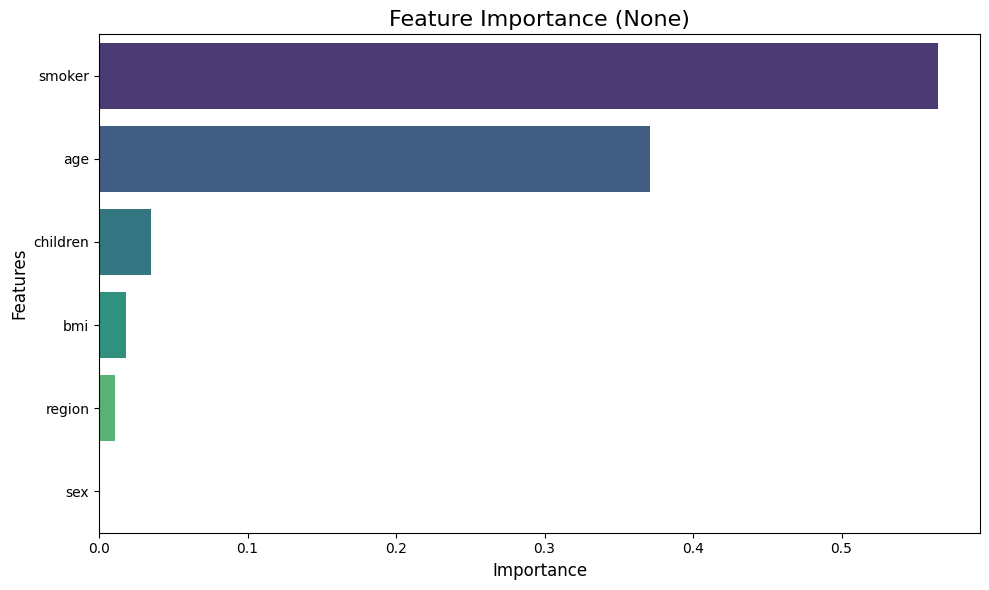

C:\Users\user\AppData\Local\Temp\ipykernel_23688\758975965.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=data, palette='viridis')


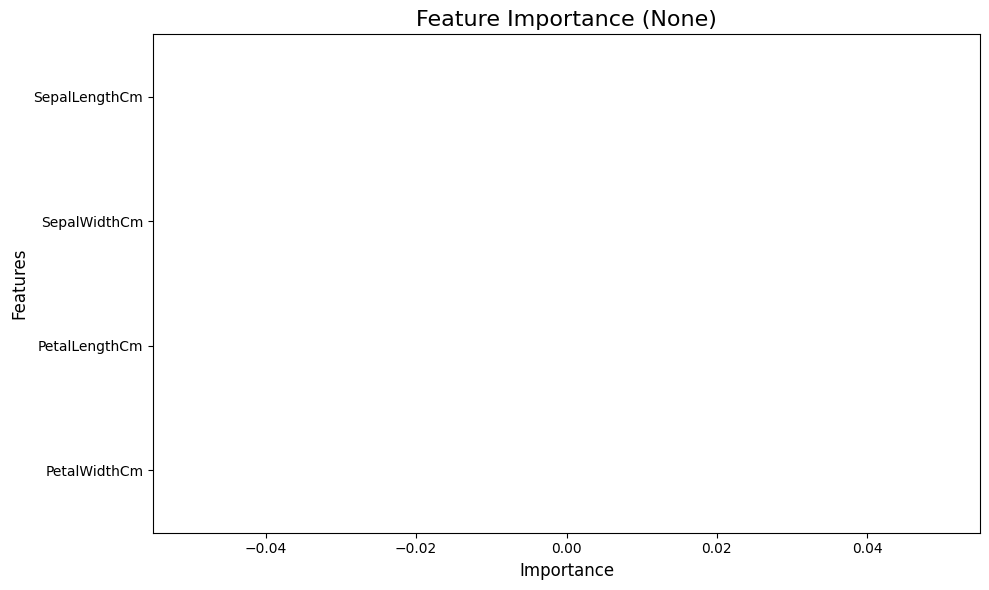

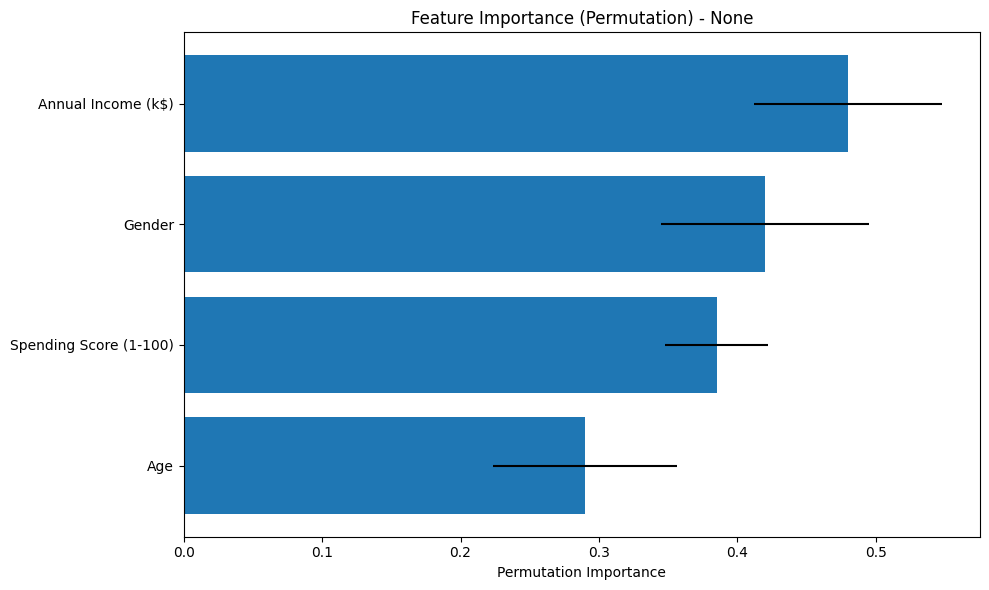

In [150]:
# Testing Feature Importance Visualization

for fi_df, task_type in zip(fi_df_list, task_type_list, ):
    
    # print(fi_df, '\n')
    
    feature_importance_visualization(fi_df, task_type)

# *VII. Visualization for 4 Metaheuristic Optimizer

C:\Users\user\AppData\Local\Temp\ipykernel_23688\4151658215.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=data, palette='viridis')


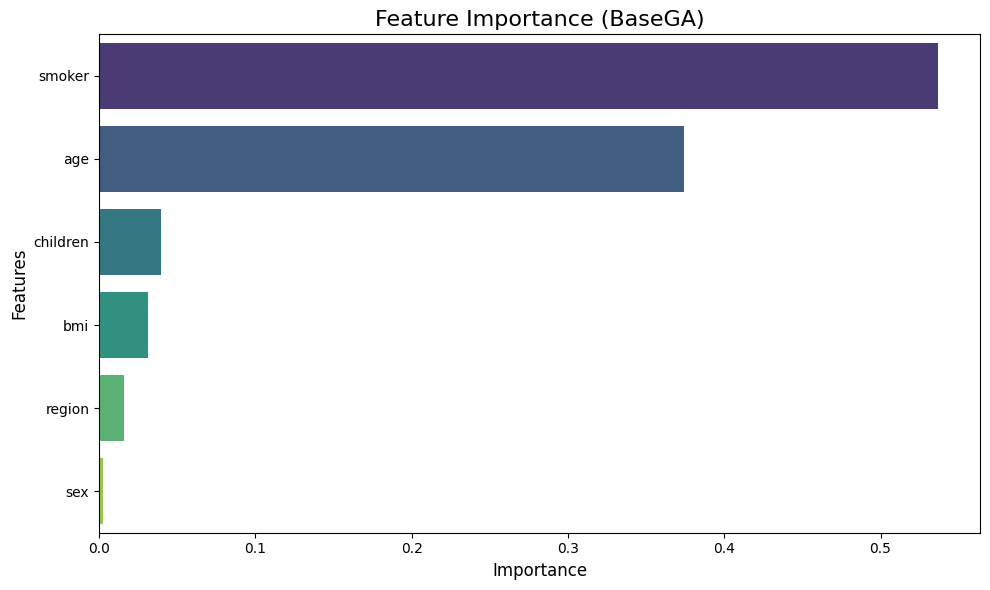

C:\Users\user\AppData\Local\Temp\ipykernel_23688\4151658215.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=data, palette='viridis')


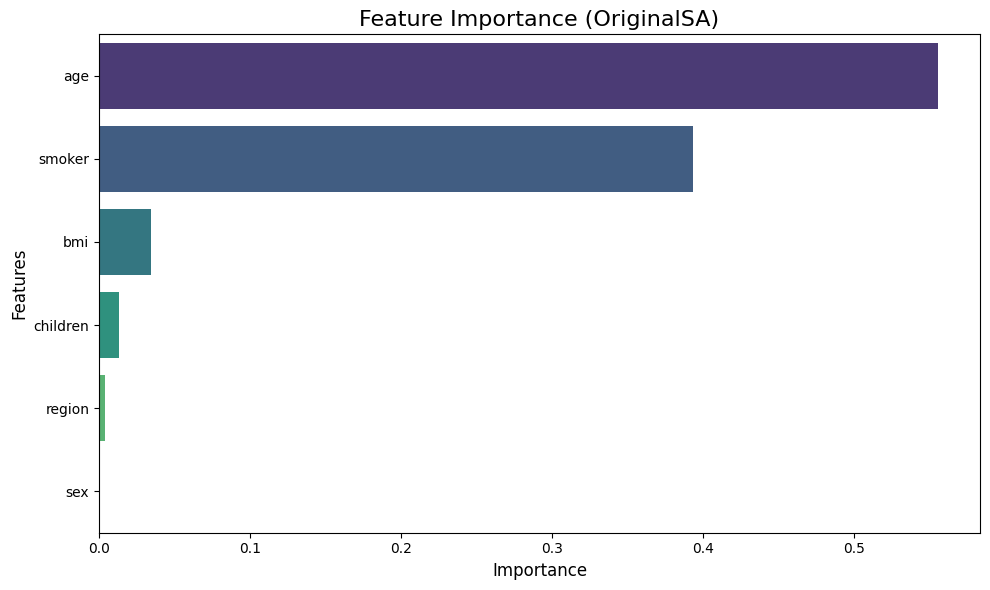

C:\Users\user\AppData\Local\Temp\ipykernel_23688\4151658215.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=data, palette='viridis')


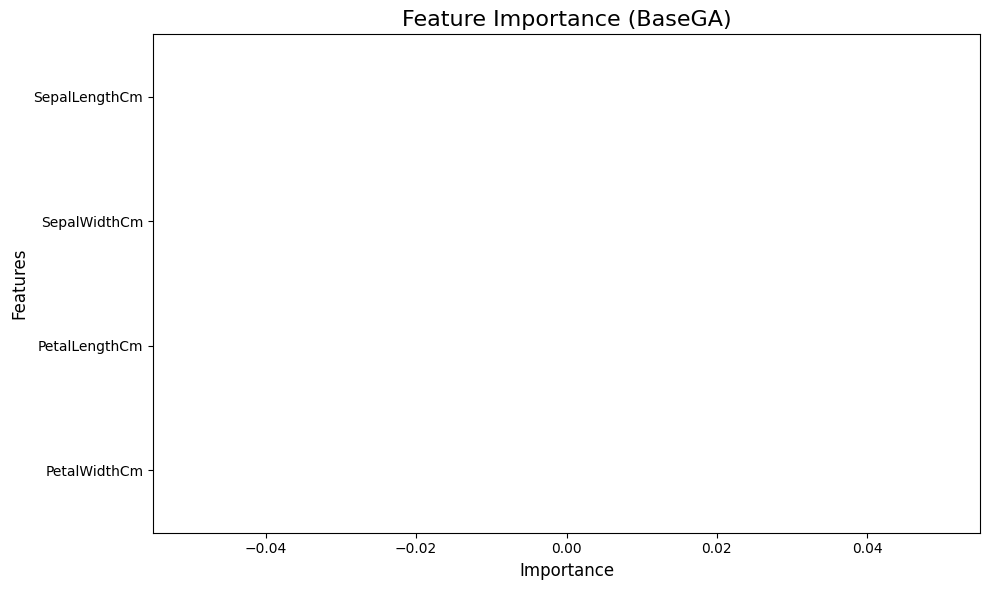

C:\Users\user\AppData\Local\Temp\ipykernel_23688\4151658215.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=data, palette='viridis')


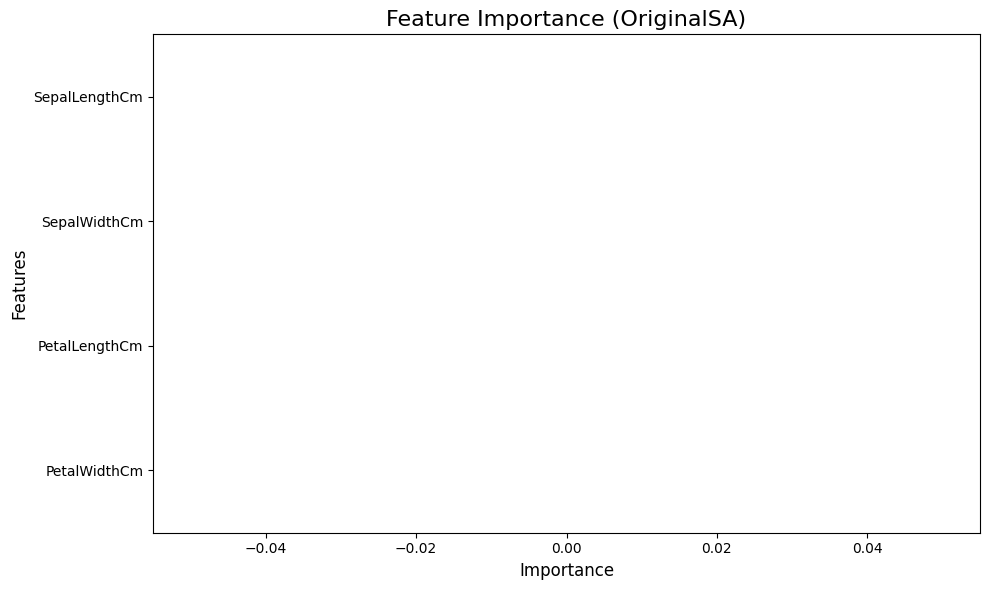

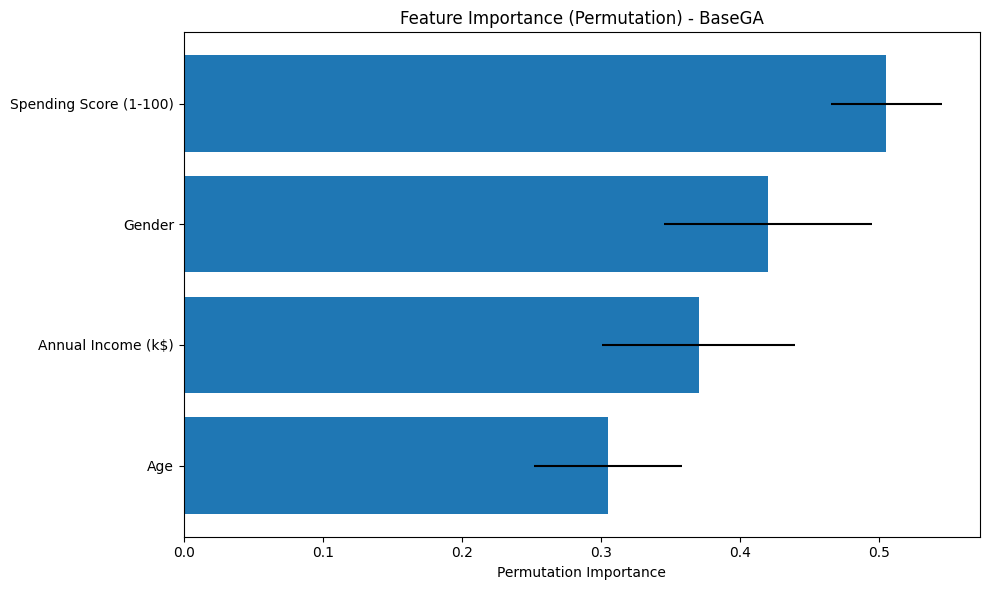

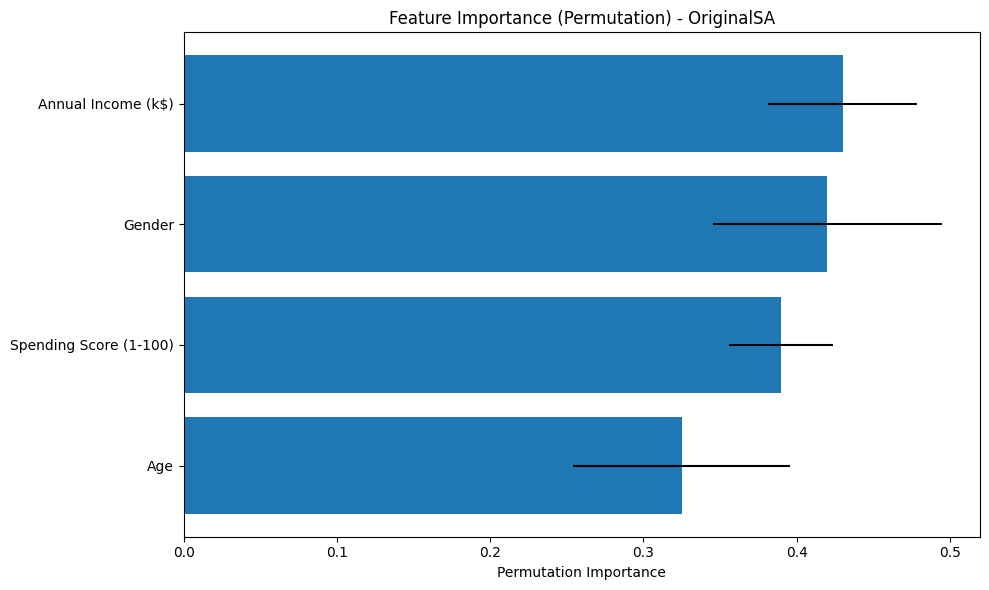

In [ ]:
for result_df, data_dict, task_type in zip(result_df_list, data_dict_list, task_type_list):

    # Optimizers names
    optimizers_names = result_df[result_df.columns[0]]

    # Machine Learning Models
    ml_models = result_df.iloc[:,2]

    # Iterate through each model
    for optimizer_name, best_ml_model in zip(optimizers_names, ml_models):

        # Compute the feature importance
        feature_importance_data = compute_feature_importance(best_ml_model, data_dict)
        
        # Generate the visualization
        feature_importance_visualization(feature_importance_data, task_type, optimizer_name)